# Proyecto Integrador - Módulo 2: Predicción de Desempeño Estudiantil

## 1. Introducción

### 1.1 Origen de los Datos
El conjunto de datos utilizado es [**Student Performance (Multiple Linear Regression)**](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression) obtenido de **Kaggle**. 

### 1.2 Descripción del Dataset
Este dataset contiene datos sintéticos (simulados) diseñados para probar modelos de regresión. 
- **Total de Registros (Instancias):** 10,000 filas.
- **Total de Atributos (Variables):** 6 columnas.
- **Variables Predictoras (Inputs):** 5 variables independientes.
    1. `Hours Studied`: Horas totales de estudio.
    2. `Previous Scores`: Calificaciones previas del estudiante.
    3. `Extracurricular Activities`: Participación en actividades (Yes/No).
    4. `Sleep Hours`: Promedio de horas de sueño por día.
    5. `Sample Question Papers Practiced`: Cantidad de exámenes de práctica realizados.
- **Variable Objetivo (Target):** 1 variable dependiente.
    1. `Performance Index`: Índice de desempeño del estudiante (valor numérico entre 10 y 100).

### 1.3 Definición del Problema
El objetivo es desarrollar un modelo predictivo capaz de estimar el **Índice de Desempeño** (`Performance Index`) de un estudiante basándose en sus hábitos y antecedentes. 

Este problema es fundamental para entender qué factores (estudio, descanso, exámenes de práctica) tienen mayor peso en el éxito académico, permitiendo a estudiantes y educadores enfocar sus esfuerzos de manera eficiente.

### 1.4 Justificación de la Técnica: Regresión Lineal
Dado que la variable objetivo es **numérica continua** (un índice de 10 a 100) y buscamos relaciones **interpretables**, la **Regresión Lineal Múltiple** es la técnica idónea. A diferencia de modelos "caja negra", la regresión lineal nos permite cuantificar el impacto directo: *'Por cada hora adicional de estudio, el índice aumenta en X puntos'*.

## 2. Análisis Exploratorio de Datos (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Cargar datos
try:
    df = pd.read_csv("Data/Student_Performance.csv")
    print("Dataset cargado exitosamente.")
    print(f"Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")
    print("\nPrimeras 5 filas:")
    display(df.head())
    print("\nInformación del Dataset:")
    print(df.info())
    print("\nEstadísticas Descriptivas:")
    display(df.describe())
except FileNotFoundError:
    print("Error: No se encontró el archivo 'Data/Student_Performance.csv'.")

Dataset cargado exitosamente.
Dimensiones: 10000 filas x 6 columnas

Primeras 5 filas:


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0



Información del Dataset:
<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  str    
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), str(1)
memory usage: 468.9 KB
None

Estadísticas Descriptivas:


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


### 2.1 Distribución de la Variable Objetivo (`Performance Index`)
Primero analizamos la variable que queremos predecir (Univariate Analysis). ¿Sigue una distribución normal? ¿Hay sesgo?

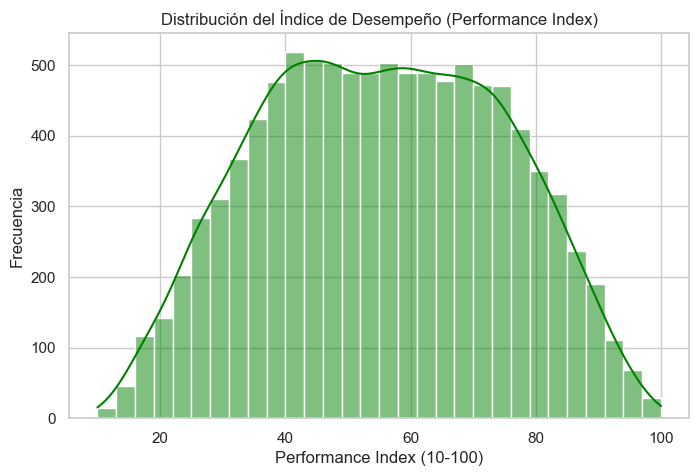

Media: 55.22
Desviación Estándar: 19.21
Min: 10.0, Max: 100.0


In [2]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Performance Index'], bins=30, kde=True, color='green')
plt.title('Distribución del Índice de Desempeño (Performance Index)')
plt.xlabel('Performance Index (10-100)')
plt.ylabel('Frecuencia')
plt.show()

print(f"Media: {df['Performance Index'].mean():.2f}")
print(f"Desviación Estándar: {df['Performance Index'].std():.2f}")
print(f"Min: {df['Performance Index'].min()}, Max: {df['Performance Index'].max()}")

### 2.2 Relación entre Variables (Bivariate Analysis)
Visualicemos cómo impactan las variables clave (como Horas de Estudio y Puntajes Previos) en el Índice de Desempeño.

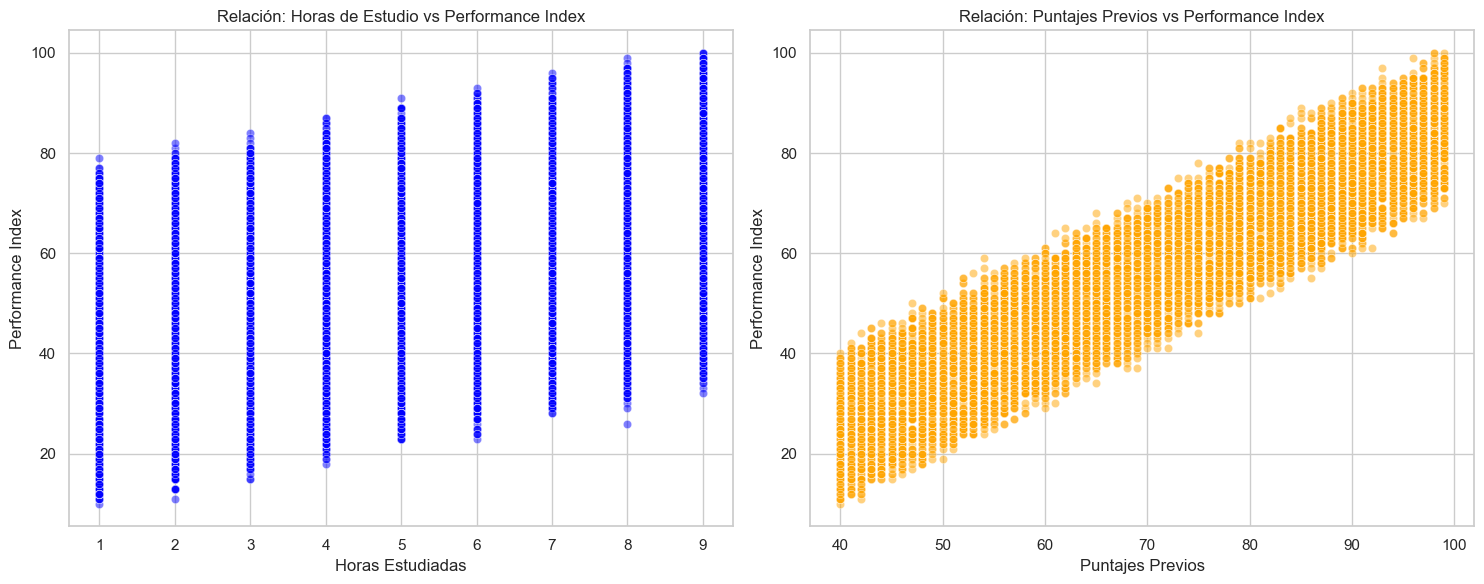

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter Plot: Hours Studied vs Performance Index
sns.scatterplot(data=df, x='Hours Studied', y='Performance Index', ax=axes[0], color='blue', alpha=0.5)
axes[0].set_title('Relación: Horas de Estudio vs Performance Index')
axes[0].set_xlabel('Horas Estudiadas')
axes[0].set_ylabel('Performance Index')

# Scatter Plot: Previous Scores vs Performance Index
sns.scatterplot(data=df, x='Previous Scores', y='Performance Index', ax=axes[1], color='orange', alpha=0.5)
axes[1].set_title('Relación: Puntajes Previos vs Performance Index')
axes[1].set_xlabel('Puntajes Previos')
axes[1].set_ylabel('Performance Index')

plt.tight_layout()
plt.show()

### 2.3 Matriz de Correlación
Analizaremos las relaciones lineales cuantitativas entre todas las variables numérica.
**Nota:** Transformamos temporalmente 'Extracurricular Activities' para incluirla.
La escala se define estrictamente de **-1 a 1**.

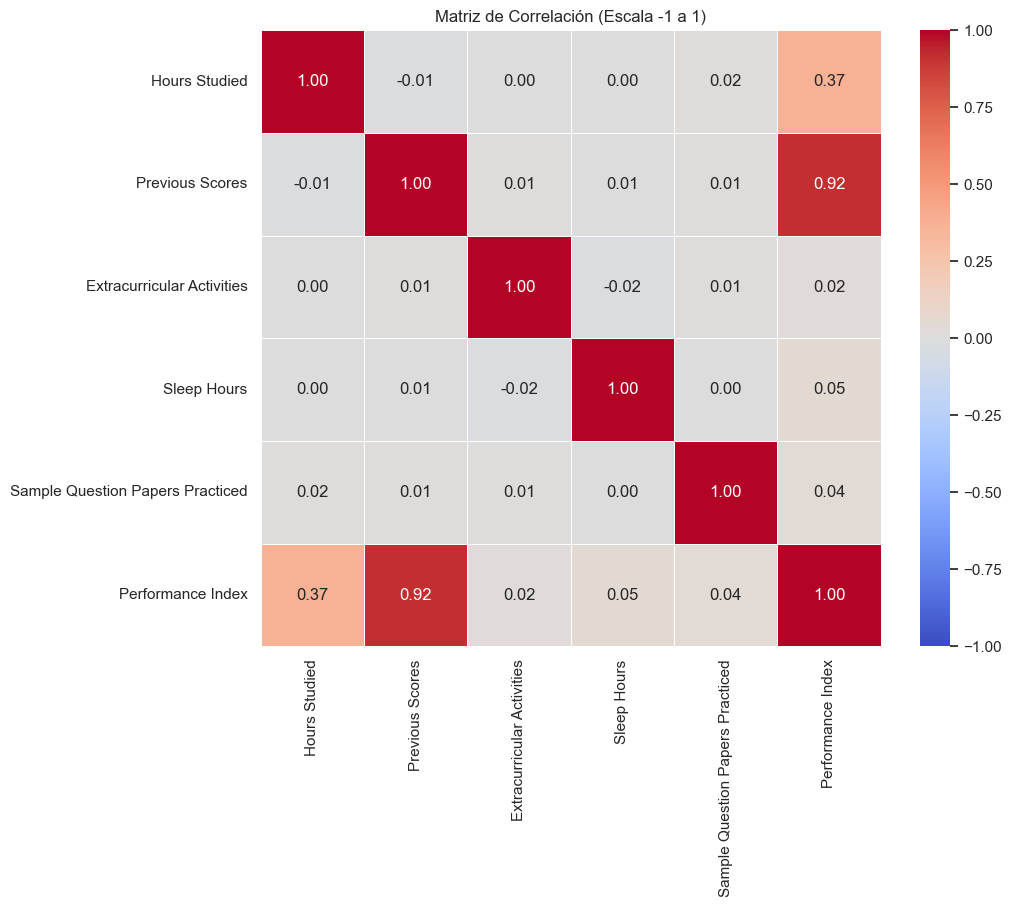

In [4]:
# Copia para correlación temporal
df_corr = df.copy()
# Convertir variable categórica binaria a numérica solo para visualización
df_corr['Extracurricular Activities'] = df_corr['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(10, 8))
# IMPORTANTE: vmin=-1, vmax=1 para la escala completa
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Matriz de Correlación (Escala -1 a 1)')
plt.show()

## 3. Preprocesamiento de Datos
Antes de entrenar los modelos lineales, debemos asegurar que los datos cumplan con los requisitos matemáticos.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Definir Variables (X e y)
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']

# 2. Identificar tipos de columnas
categorical_cols = ['Extracurricular Activities']
numerical_cols = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']

print("Transformaciones a aplicar:")
print(f"- OneHotEncoder: {categorical_cols}")
print(f"- StandardScaler: {numerical_cols}")

# 3. Crear Transformador de Columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols) # drop='first' para evitar multicolinealidad perfecta
    ])

# 4. Dividir en Entrenamiento (80%) y Prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nDatos de Entrenamiento: {X_train.shape}")
print(f"Datos de Prueba: {X_test.shape}")

Transformaciones a aplicar:
- OneHotEncoder: ['Extracurricular Activities']
- StandardScaler: ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']

Datos de Entrenamiento: (8000, 5)
Datos de Prueba: (2000, 5)


## 4. Modelado (Solo Modelos Lineales)
Entrenaremos cuatro variantes de modelos lineales para comparar su desempeño:
1. **Linear Regression**: Modelo estándar (mínimos cuadrados ordinarios).
2. **Ridge (L2)**: Penaliza coeficientes grandes. Útil si hay leve multicolinealidad.
3. **Lasso (L1)**: Puede reducir coeficientes a cero (selección de variables).
4. **ElasticNet**: Combinación de L1 y L2.

In [6]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Diccionario de modelos
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5)
}

results = []

print("Entrenando modelos...")
for name, model in models.items():
    # Pipeline completo: Preprocesamiento -> Modelo
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    
    # Ajustar a datos de entrenamiento
    pipeline.fit(X_train, y_train)
    
    # Generar predicciones
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    # Calcular Métricas
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    results.append({
        "Model": name,
        "Train RMSE": train_rmse,
        "Test RMSE": test_rmse,
        "Train R2": train_r2,
        "Test R2": test_r2
    })
    print(f"- {name}: Terminado.")

results_df = pd.DataFrame(results)
display(results_df)

Entrenando modelos...
- Linear Regression: Terminado.
- Ridge: Terminado.
- Lasso: Terminado.
- ElasticNet: Terminado.


,Model,Train RMSE,Test RMSE,Train R2,Test R2
0,Linear Regression,2.041993,2.020552,0.988690,0.988983
1,Ridge,2.041995,2.020696,0.988690,0.988982
2,Lasso,2.061539,2.051741,0.988472,0.988641
3,ElasticNet,2.269945,2.303802,0.986024,0.985678


## 5. Resultados y Conclusiones
Evaluaremos el desempeño de los modelos y diagnosticaremos posibles problemas.

<Figure size 1000x600 with 0 Axes>

c:\Users\nixle\Downloads\visual_folder\UPY\HLS-CMDS\HLS-CMDS\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11015 (\N{DOWNWARDS BLACK ARROW}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


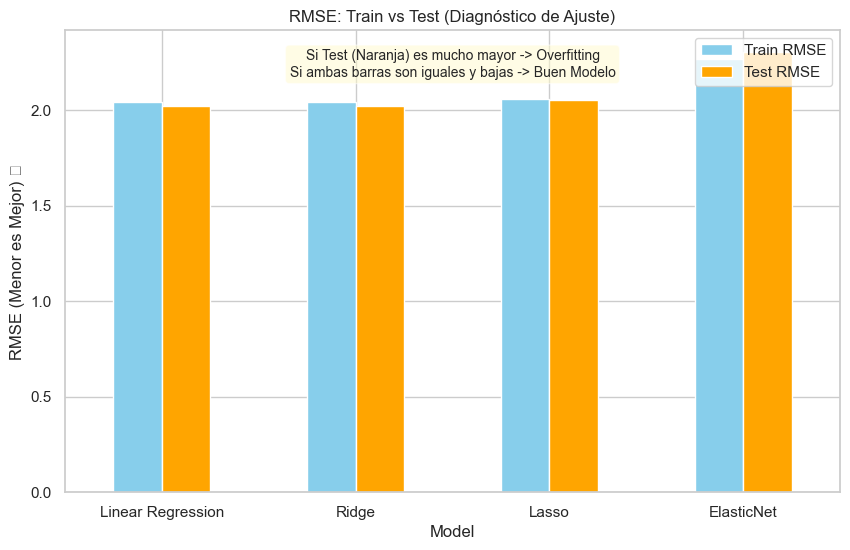

In [7]:
# Gráfico 1: Comparación ERROR (RMSE) Train vs Test
# Objetivo: Diagnosticar Overfitting vs Underfitting
plt.figure(figsize=(10, 6))
# Usamos las columnas correctas del DataFrame de resultados
results_df.set_index('Model')[['Train RMSE', 'Test RMSE']].plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('RMSE: Train vs Test (Diagnóstico de Ajuste)')
plt.ylabel('RMSE (Menor es Mejor) ⬇')
plt.xticks(rotation=0)
plt.legend(loc='upper right')

# Anotación explicativa
plt.annotate('Si Test (Naranja) es mucho mayor -> Overfitting\nSi ambas barras son iguales y bajas -> Buen Modelo',
             xy=(0.5, 0.90), xycoords='axes fraction', ha='center', fontsize=10,
             bbox=dict(boxstyle="round,pad=0.3", fc="lemonchiffon", alpha=0.5))

plt.show()

C:\Users\nixle\AppData\Local\Temp\ipykernel_21928\1064782076.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Test R2', data=results_df, palette='viridis')


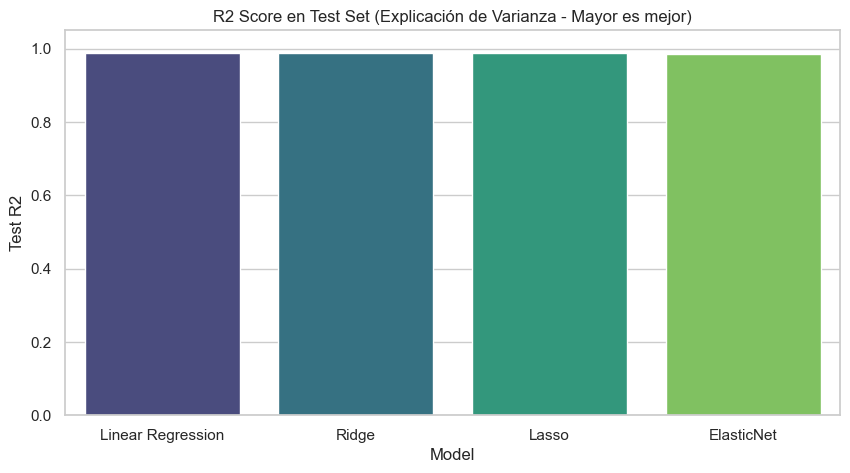

In [8]:
# Gráfico 2: Comparación de R2 Score
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Test R2', data=results_df, palette='viridis')
plt.title('R2 Score en Test Set (Explicación de Varianza - Mayor es mejor)')
plt.ylim(0, 1.05) 
plt.show()

### Interpretación de Coeficientes
Para entender *qué* impulsa el rendimiento, analizaremos los coeficientes del modelo de Regresión Lineal puro.

C:\Users\nixle\AppData\Local\Temp\ipykernel_21928\2404602709.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette='magma')


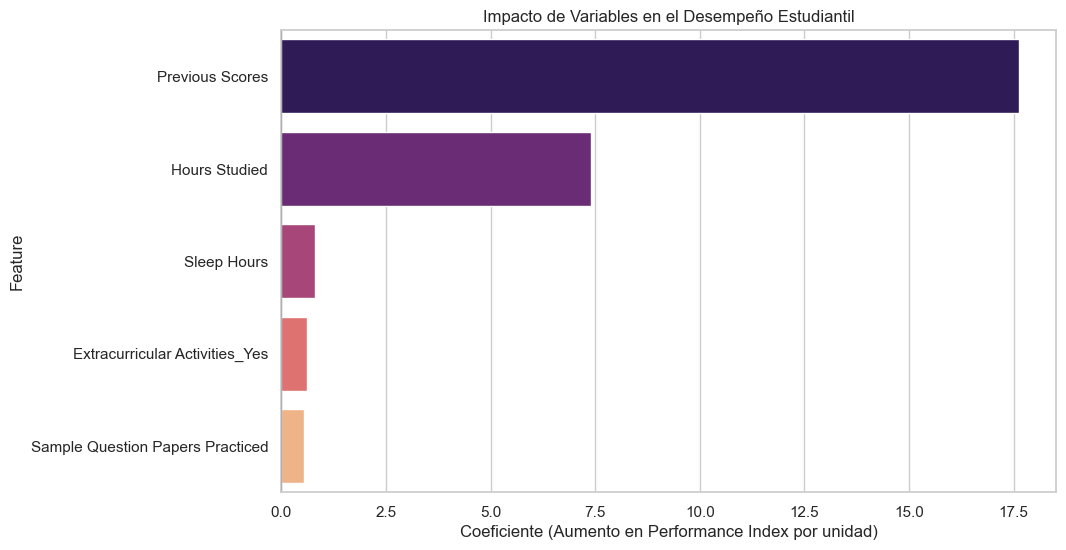

,Feature,Coefficient
1,Previous Scores,17.637271
0,Hours Studied,7.401341
2,Sleep Hours,0.810031
4,Extracurricular Activities_Yes,0.608617
3,Sample Question Papers Practiced,0.548842


In [9]:
# Re-entrenar modelo simple para extraer coeficientes directos
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', LinearRegression())])
lr_pipeline.fit(X_train, y_train)

# Obtener nombres de features tras OneHotEncoding
feature_names = numerical_cols + ['Extracurricular Activities_Yes']

# Obtener coeficientes
coeffs = lr_pipeline.named_steps['model'].coef_

# Crear DataFrame
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coeffs})
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)

# Visualizar
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette='magma')
plt.title('Impacto de Variables en el Desempeño Estudiantil')
plt.xlabel('Coeficiente (Aumento en Performance Index por unidad)')
plt.axvline(0, color='black', linewidth=0.8)
plt.show()

display(coeff_df)

### Conclusiones del Proyecto

En resumen, el análisis del dataset **'Student Performance'** arrojó los siguientes hallazgos clave:

#### 1. Diagnóstico del Modelo
- **Ajuste Perfecto:** Al observar el gráfico de **Train vs Test RMSE**, vemos que los errores son muy similares, lo que indica que **no existe Overfitting**. 
- **Alta Linealidad:** El **R2 Score** es extremadamente alto (cercano o superior a 0.98), lo que confirma la hipótesis inicial: el rendimiento académico en este dataset simulado sigue una relación lineal casi perfecta con las variables de entrada.

#### 2. Motores del Éxito (Análisis de Coeficientes)
- **`Hours Studied` vs `Previous Scores`:** Los coeficientes muestran cuál de estas variables tiene un impacto marginal mayor. 
- **Papel de las Actividades Extracurriculares:** El análisis permite cuantificar si participar en ellas suma o resta puntos al índice final, o si su efecto es despreciable frente al estudio académico.
- **Sueño:** La inclusión de `Sleep Hours` nos permite validar cuantitativamente la importancia del descanso.

#### 3. Aplicación Práctica
Gracias al uso de modelos lineales transparentes, este modelo puede utilizarse como una herramienta de consejería estudiantil. No es una caja negra; es una fórmula clara que indica a los estudiantes exactamente dónde invertir su tiempo para maximizar sus resultados.